#### 학습목표
- 시각화 패키지 : matplotlib.pyplot
- 고급시각화 패키지 : seaborn
- 지도 시각화 : folium
- 분석을 통한 시각화

In [2]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

numpy version  -  1.20.3
pandas version -  1.3.4


In [3]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

##### plot 유형
- line : (데이터가 시간, 순서등에 따라서 어떻게 변화는지를 보여주는 시각화)
- area
- surface
- bar
- hist
- box

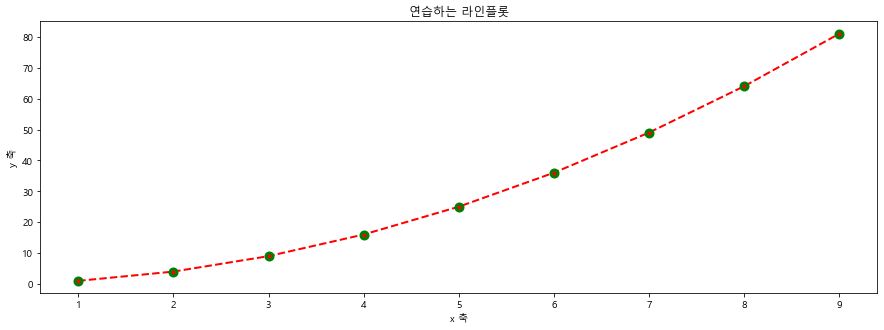

In [29]:
plt.figure( figsize = (15, 5))

x_data = [1,2,3,4,5,6,7,8,9]
y_data = [ x ** 2 for x in x_data]

plt.plot(x_data , y_data , 
         c  = 'red' , 
         lw = '2' , 
         ls = '--' , 
         marker = 'o' , 
         ms = 7 , 
         mec = 'green' , 
         mew = 3,
         mfc = 'red')

plt.xlabel('x 축') 
plt.ylabel('y 축') 
plt.title('연습하는 라인플롯')
plt.show()
plt.close()


- 시도별 전출입 인구수.xlsx 이용한 라인플롯

In [36]:
pop_frm = pd.read_excel('./visualization_data/시도별 전출입 인구수.xlsx' , header = 0   )
pop_frm

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536.0,4210164.0,3687938.0,4860418.0,5297969.0,9011440.0,6773250.0,7397623.0,...,8808256.0,8487275.0,8226594.0,8127195.0,7506691.0,7411784.0,7629098.0,7755286.0,7378430.0,7154226.0
2,NaN,서울특별시,1742813.0,1671705.0,1349333.0,1831858.0,2050392.0,3396662.0,2756510.0,2893403.0,...,2025358.0,1873188.0,1733015.0,1721748.0,1555281.0,1520090.0,1573594.0,1589431.0,1515602.0,1472937.0
3,NaN,부산광역시,448577.0,389797.0,362202.0,482061.0,680984.0,805979.0,724664.0,785117.0,...,514502.0,519310.0,519334.0,508043.0,461042.0,478451.0,485710.0,507031.0,459015.0,439073.0
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938.0,398626.0,370817.0,370563.0,348642.0,351873.0,350213.0,351424.0,328228.0,321182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139.0,202.0,141.0,210.0,219.0,415.0,392.0,408.0,...,668.0,579.0,672.0,561.0,551.0,516.0,609.0,683.0,733.0,768.0
321,NaN,전라남도,631.0,965.0,857.0,952.0,1133.0,2808.0,2608.0,2652.0,...,1143.0,1123.0,1002.0,1026.0,966.0,1001.0,928.0,1062.0,1127.0,1102.0
322,NaN,경상북도,374.0,619.0,468.0,576.0,625.0,1123.0,1141.0,1004.0,...,761.0,704.0,738.0,756.0,699.0,781.0,728.0,903.0,931.0,994.0
323,NaN,경상남도,474.0,479.0,440.0,571.0,1208.0,1517.0,863.0,1122.0,...,1517.0,1474.0,1324.0,1367.0,1227.0,1278.0,1223.0,1500.0,1448.0,1501.0


In [37]:
pop_frm = pop_frm.fillna(method = 'ffill')
pop_frm

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536.0,4210164.0,3687938.0,4860418.0,5297969.0,9011440.0,6773250.0,7397623.0,...,8808256.0,8487275.0,8226594.0,8127195.0,7506691.0,7411784.0,7629098.0,7755286.0,7378430.0,7154226.0
2,전국,서울특별시,1742813.0,1671705.0,1349333.0,1831858.0,2050392.0,3396662.0,2756510.0,2893403.0,...,2025358.0,1873188.0,1733015.0,1721748.0,1555281.0,1520090.0,1573594.0,1589431.0,1515602.0,1472937.0
3,전국,부산광역시,448577.0,389797.0,362202.0,482061.0,680984.0,805979.0,724664.0,785117.0,...,514502.0,519310.0,519334.0,508043.0,461042.0,478451.0,485710.0,507031.0,459015.0,439073.0
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938.0,398626.0,370817.0,370563.0,348642.0,351873.0,350213.0,351424.0,328228.0,321182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139.0,202.0,141.0,210.0,219.0,415.0,392.0,408.0,...,668.0,579.0,672.0,561.0,551.0,516.0,609.0,683.0,733.0,768.0
321,제주특별자치도,전라남도,631.0,965.0,857.0,952.0,1133.0,2808.0,2608.0,2652.0,...,1143.0,1123.0,1002.0,1026.0,966.0,1001.0,928.0,1062.0,1127.0,1102.0
322,제주특별자치도,경상북도,374.0,619.0,468.0,576.0,625.0,1123.0,1141.0,1004.0,...,761.0,704.0,738.0,756.0,699.0,781.0,728.0,903.0,931.0,994.0
323,제주특별자치도,경상남도,474.0,479.0,440.0,571.0,1208.0,1517.0,863.0,1122.0,...,1517.0,1474.0,1324.0,1367.0,1227.0,1278.0,1223.0,1500.0,1448.0,1501.0


In [43]:
print('서울에서 다른 지역으로 이동한 데이터만 추출하다면? - ') 
pop_frm.columns

mask = (pop_frm['전출지별'] == '서울특별시') & (pop_frm['전입지별'] != '서울특별시')
seoul_subset = pop_frm[mask]
seoul_subset

서울에서 다른 지역으로 이동한 데이터만 추출하다면? - 


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928.0,1620640.0,1661425.0,1726687.0,1655859.0,1571423.0
21,서울특별시,부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,...,17353.0,17738.0,17418.0,18816.0,16135.0,16153.0,17320.0,17009.0,15062.0,14484.0
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720.0,10464.0,10277.0,10397.0,10135.0,10631.0,10062.0,10191.0,9623.0,8891.0
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493.0,45392.0,46082.0,51641.0,49640.0,47424.0,43212.0,44915.0,43745.0,40485.0
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846.0,11725.0,11095.0,10587.0,10154.0,9129.0,9759.0,9216.0,8354.0,7932.0
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515.0,13632.0,13819.0,13900.0,14080.0,13440.0,13403.0,13453.0,12619.0,11815.0
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057.0,4845.0,4742.0,5188.0,5691.0,5542.0,6047.0,5950.0,5102.0,4260.0
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998.0,2851.0,6481.0,7550.0,5943.0,5813.0
28,서울특별시,경기도,130149.0,150313.0,93333.0,143234.0,149045.0,253705.0,202276.0,207722.0,...,412408.0,398282.0,410735.0,373771.0,354135.0,340801.0,332785.0,359337.0,370760.0,342433.0
29,서울특별시,강원도,9352.0,12885.0,13561.0,16481.0,15479.0,27837.0,25927.0,25415.0,...,23668.0,23331.0,22736.0,23624.0,22332.0,20601.0,21173.0,22659.0,21590.0,21016.0


In [44]:
print('전출지별 피처를 삭제한다면? - ') 
seoul_subset.drop(['전출지별'] , axis = 1 , inplace = True)


전출지별 피처를 삭제한다면? - 


In [47]:
seoul_subset.set_index('전입지별' , inplace = True ) 
seoul_subset

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,3028911.0,2441242.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928.0,1620640.0,1661425.0,1726687.0,1655859.0,1571423.0
부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,17353.0,17738.0,17418.0,18816.0,16135.0,16153.0,17320.0,17009.0,15062.0,14484.0
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720.0,10464.0,10277.0,10397.0,10135.0,10631.0,10062.0,10191.0,9623.0,8891.0
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493.0,45392.0,46082.0,51641.0,49640.0,47424.0,43212.0,44915.0,43745.0,40485.0
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846.0,11725.0,11095.0,10587.0,10154.0,9129.0,9759.0,9216.0,8354.0,7932.0
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515.0,13632.0,13819.0,13900.0,14080.0,13440.0,13403.0,13453.0,12619.0,11815.0
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057.0,4845.0,4742.0,5188.0,5691.0,5542.0,6047.0,5950.0,5102.0,4260.0
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998.0,2851.0,6481.0,7550.0,5943.0,5813.0
경기도,130149.0,150313.0,93333.0,143234.0,149045.0,253705.0,202276.0,207722.0,237684.0,278411.0,...,412408.0,398282.0,410735.0,373771.0,354135.0,340801.0,332785.0,359337.0,370760.0,342433.0


In [49]:
print('서울 -> 경기도로 이동한 인구 데이터만 선택한다면? - ') 
datas = seoul_subset.loc['경기도'] 
print('type   - ' , type(datas))
print()
print('index  - ' , datas.index)
print()
print('values - ' , datas.values)
print()


서울 -> 경기도로 이동한 인구 데이터만 선택한다면? - 
type   -  <class 'pandas.core.series.Series'>

index  -  Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

values -  [130149.0 150313.0 93333.0 143234.0 149045.0 253705.0 202276.0 207722.0
 237684.0 278411.0 297539.0 252073.0 320174.0 400875.0 352238.0 390265.0
 412535.0 405220.0 415174.0 412933.0 473889.0 384714.0 428344.0 502584.0
 542204.0 599411.0 520566.0 495454.0 407050.0 471841.0 435573.0 499575.0
 516765.0 457656.0 400206.0 414621.0 449632.0 431637.0 412408.0 398282.0
 410735.0 373771.0 354135.0 340801.0 332785.0 359337.0 370760.0 342433.0]



경기도 이동한 인구 데이터값을 이용한 라인플롯 - 



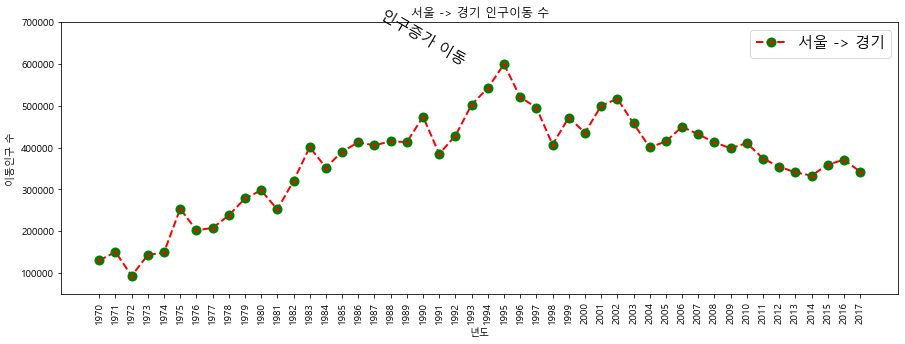

In [67]:
print('경기도 이동한 인구 데이터값을 이용한 라인플롯 - ')
print()

plt.figure( figsize = (15, 5))


plt.plot(datas.index , datas.values , 
         c  = 'red' , 
         lw = '2' , 
         ls = '--' , 
         marker = 'o' , 
         ms = 7 , 
         mec = 'green' , 
         mew = 3,
         mfc = 'red')



plt.xlabel('년도') 
plt.ylabel('이동인구 수') 
plt.title('서울 -> 경기 인구이동 수')

# 눈금 라벨 회전(x 축)
plt.xticks(rotation = 'vertical')

# 범례
plt.legend(labels = ['서울 -> 경기'] , loc = 'best' , fontsize = 15)

# y축의 범위 지정
plt.ylim(50000 , 700000)

# 주석표시
plt.annotate('인구증가 이동' , 
             xy = (20, 600000) , 
             fontsize = 15 , 
             rotation = -30, 
             va = 'baseline' , 
             ha = 'center'
            )

plt.show()
plt.close()


subplot 이용한 시각화 - 


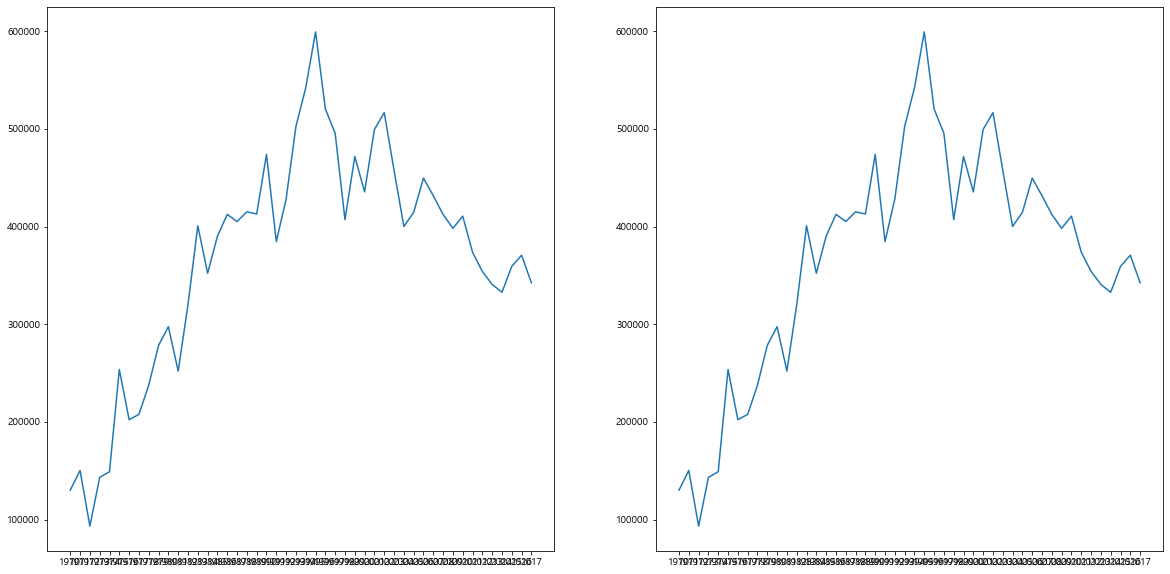

In [71]:
print('subplot 이용한 시각화 - ') 

fig = plt.figure( figsize = (20, 10))

ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

ax01.plot(datas.index , datas.values)

ax02.plot(datas.index , datas.values)

plt.show()
plt.close()

충청남도, 경상북도, 강원도로 이동한 인구 데이터값만 선택해서 하나의 figure에 시각화 - 


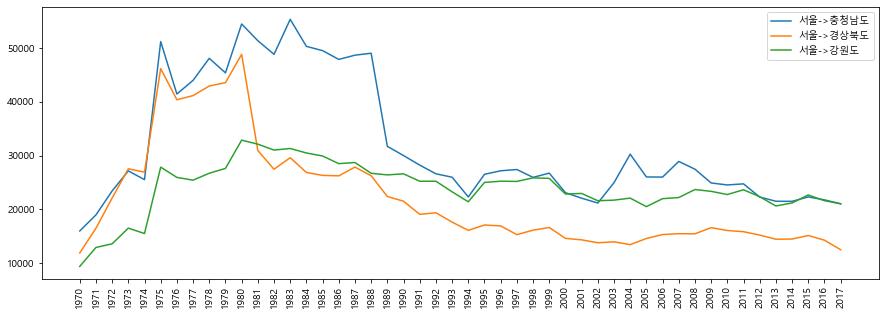

In [80]:
print('충청남도, 경상북도, 강원도로 이동한 인구 데이터값만 선택해서 하나의 figure에 시각화 - ')
plt.figure( figsize = (15, 5))

plt.plot(seoul_subset.columns.values , seoul_subset.loc['충청남도'] , label = '서울->충청남도')
plt.plot(seoul_subset.columns.values , seoul_subset.loc['경상북도'] , label = '서울->경상북도')
plt.plot(seoul_subset.columns.values , seoul_subset.loc['강원도'] ,   label = '서울->강원도')

plt.legend(loc='best')
# 눈금 라벨 회전(x 축)
plt.xticks(rotation = 'vertical')

plt.show()
plt.close()

충청남도, 경상북도, 강원도로 이동한 인구 데이터값만 선택해서 subplot 시각화 - 
subplot 이용한 시각화 - 


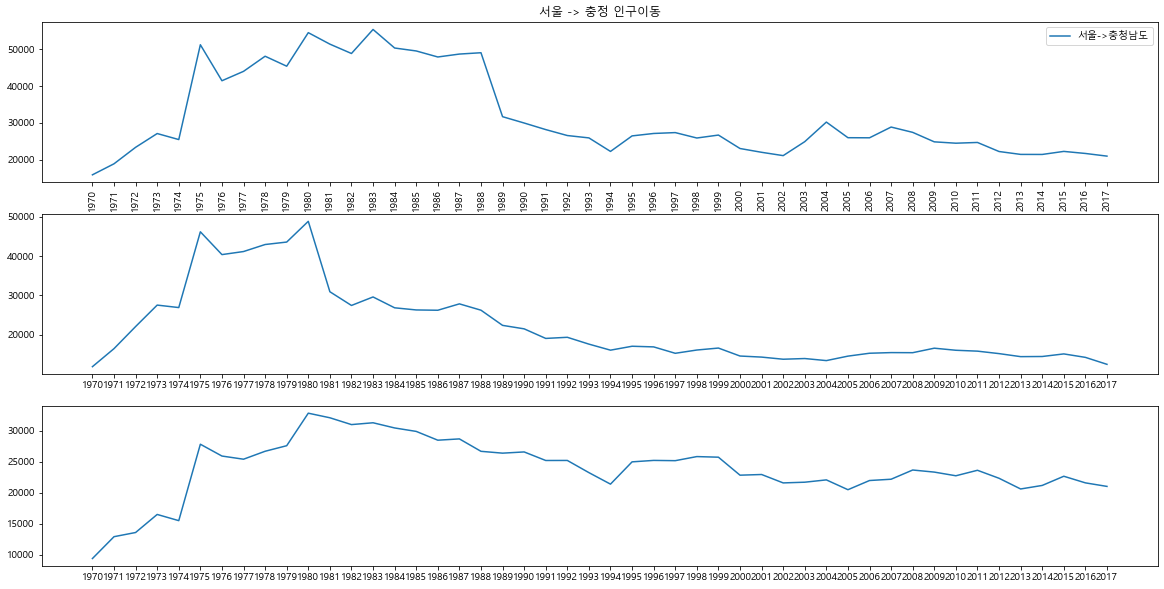

In [89]:
print('충청남도, 경상북도, 강원도로 이동한 인구 데이터값만 선택해서 subplot 시각화 - ')
print('subplot 이용한 시각화 - ') 

fig = plt.figure( figsize = (20, 10))

ax01 = fig.add_subplot(3,1,1)
ax02 = fig.add_subplot(3,1,2)
ax03 = fig.add_subplot(3,1,3)

ax01.plot(seoul_subset.columns.values , seoul_subset.loc['충청남도'] , label = '서울->충청남도')
ax02.plot(seoul_subset.columns.values , seoul_subset.loc['경상북도'])
ax03.plot(seoul_subset.columns.values , seoul_subset.loc['강원도'])

ax01.set_title('서울 -> 충정 인구이동')
ax01.set_xticklabels(seoul_subset.columns.values , rotation = 'vertical')
ax01.legend()

plt.show()
plt.close()


In [111]:
print('plot()에서 다른 차트를 시각화? - kind = ')
print()
print('충청남도, 경상북도, 강원도, 전라남도 이동인구 데이터값만 추출 - ') 
area_04_frm =  seoul_subset.loc[['충청남도','경상북도','강원도','전라남도'] , : ]
area_04_frm

plot()에서 다른 차트를 시각화? - kind = 

충청남도, 경상북도, 강원도, 전라남도 이동인구 데이터값만 추출 - 


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
충청남도,15954.0,18943.0,23406.0,27139.0,25509.0,51205.0,41447.0,43993.0,48091.0,45388.0,...,27458.0,24889.0,24522.0,24723.0,22269.0,21486.0,21473.0,22299.0,21741.0,21020.0
경상북도,11868.0,16459.0,22073.0,27531.0,26902.0,46177.0,40376.0,41155.0,42940.0,43565.0,...,15425.0,16569.0,16042.0,15818.0,15191.0,14420.0,14456.0,15113.0,14236.0,12464.0
강원도,9352.0,12885.0,13561.0,16481.0,15479.0,27837.0,25927.0,25415.0,26700.0,27599.0,...,23668.0,23331.0,22736.0,23624.0,22332.0,20601.0,21173.0,22659.0,21590.0,21016.0
전라남도,10513.0,16755.0,20157.0,22160.0,21314.0,46610.0,46251.0,43430.0,44624.0,47934.0,...,16601.0,17468.0,16429.0,15974.0,14765.0,14187.0,14591.0,14598.0,13065.0,12426.0


In [112]:
area_04_frm = area_04_frm.T
area_04_frm

print('x 축 눈금라벨 표시를 위해서 타입 변경 - ')
# area_04_frm.index = area_04_frm.index.astype(int)
# area_04_frm.index

area_04_frm.index = area_04_frm.index.map(int)

x 축 눈금라벨 표시를 위해서 타입 변경 - 


kind = area 면적그래프 - 


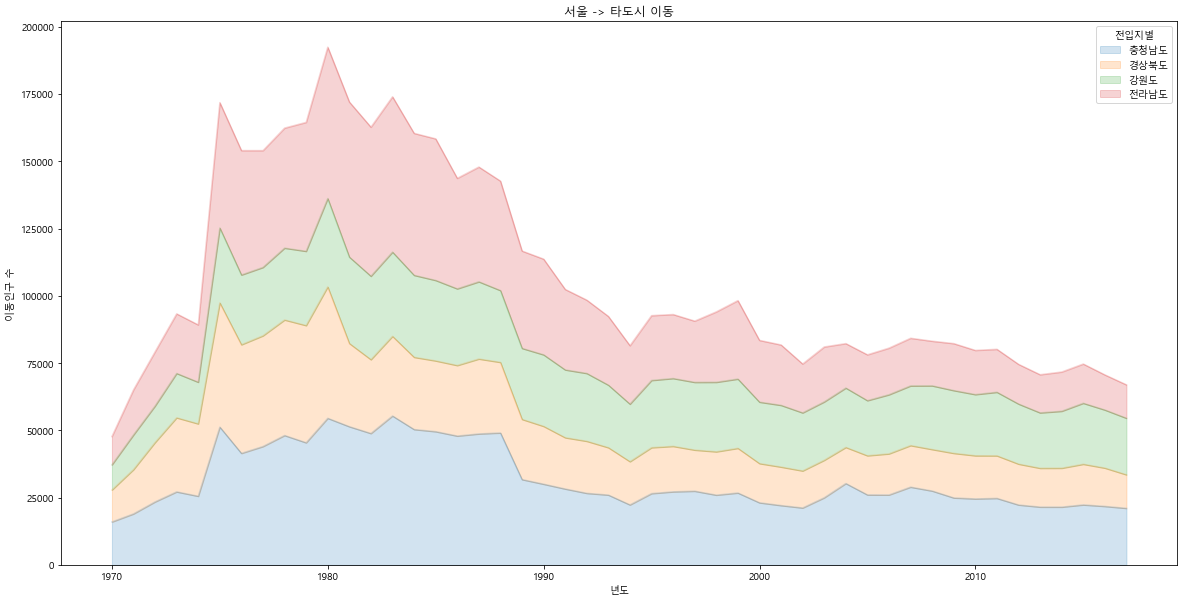

In [113]:
print('kind = area 면적그래프 - ') 


area_04_frm.plot(kind='area' , figsize = (20, 10) , alpha=0.2 , stacked = True)

plt.title('서울 -> 타도시 이동')
plt.xlabel('년도') 
plt.ylabel('이동인구 수') 

plt.show()
plt.close()


kind = bar 막대그래프 - 


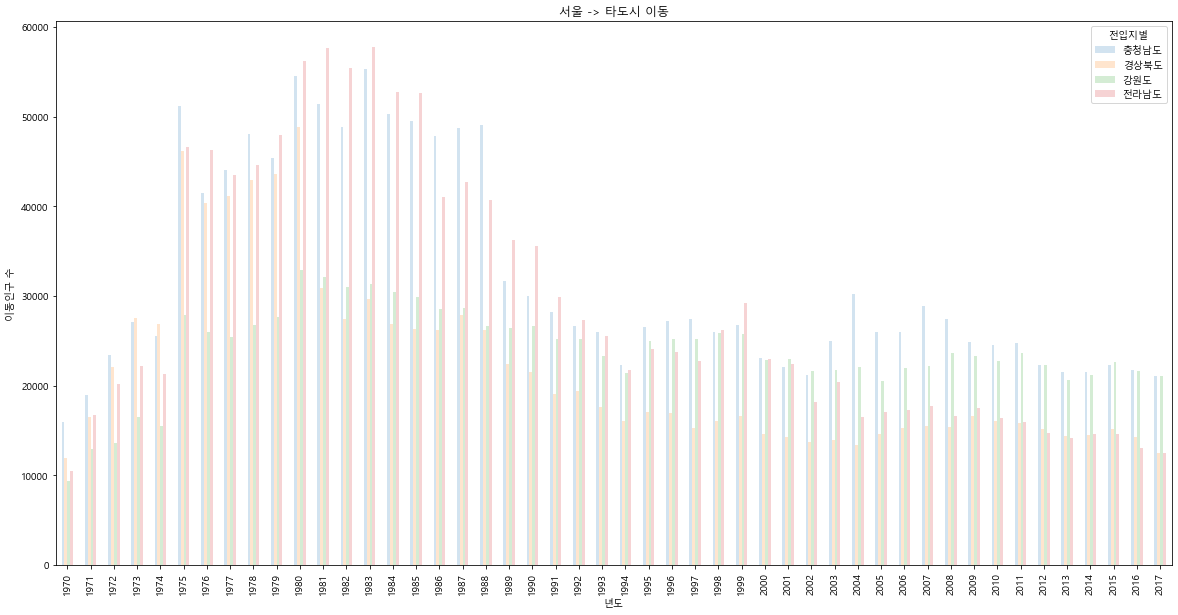

In [115]:
print('kind = bar 막대그래프 - ') 
print('plt.bar() ')

area_04_frm.plot(kind='bar' , figsize = (20, 10) , alpha=0.2 )

plt.title('서울 -> 타도시 이동')
plt.xlabel('년도') 
plt.ylabel('이동인구 수') 

plt.show()
plt.close()


- bar plot

In [116]:
import seaborn as sns

In [117]:
iris_dataset = sns.load_dataset('iris')
titanic_dataset = sns.load_dataset('titanic')

In [121]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [135]:
print('선실등급 따른 생존자 수를 bar  , barh 시각화 한다면? - ') 

plt.figure( figsize = (15 , 5))

plt.show()
plt.close()

선실등급 따른 생존자 수를 bar  , barh 시각화 한다면? - 


<Figure size 1080x360 with 0 Axes>

CategoricalIndex(['First', 'Second', 'Third'], categories=['First', 'Second', 'Third'], ordered=False, dtype='category', name='class')

[136  87 119]


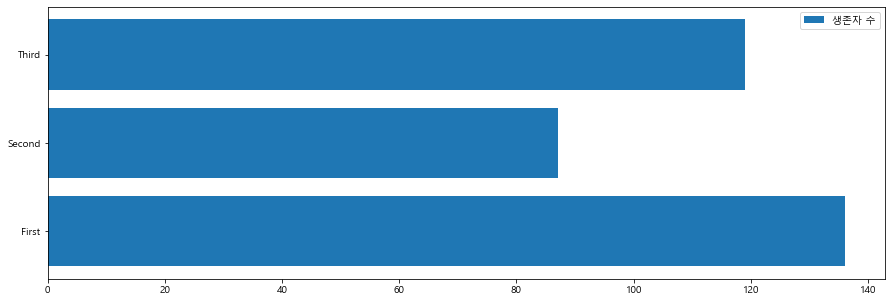

In [141]:
X = titanic_dataset.groupby('class')['survived'].sum().index
print( X ) 
print()
Y = titanic_dataset.groupby('class')['survived'].sum().values
print( Y ) 

plt.figure( figsize = (15 , 5))

plt.barh(X, Y , label='생존자 수')

plt.legend(loc='best')

plt.show()
plt.close()


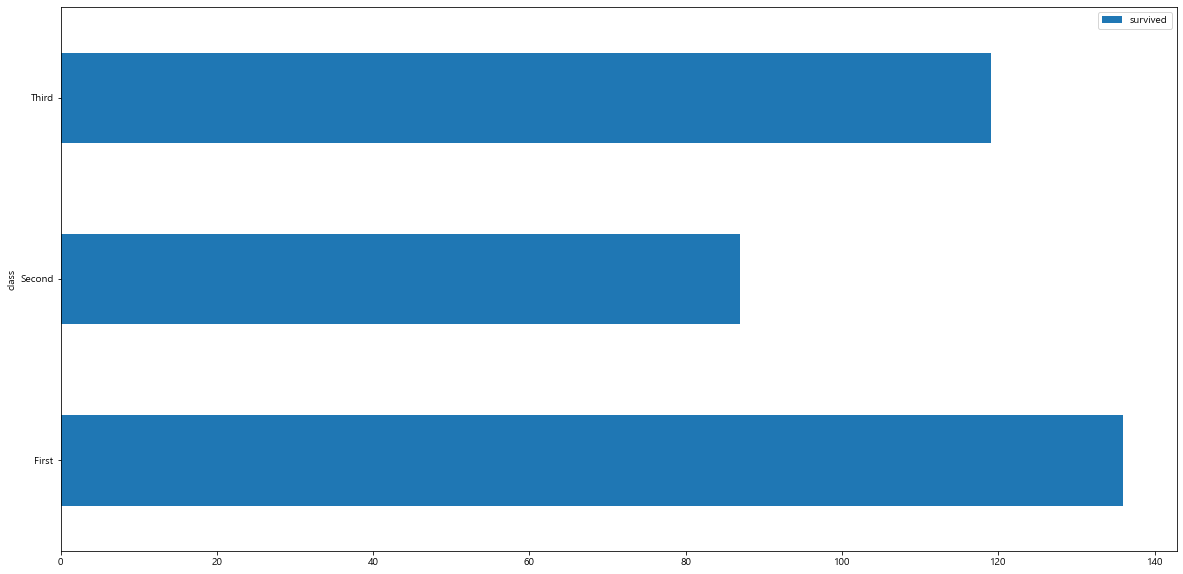

In [137]:
class_grp_frm = titanic_dataset.pivot_table(index='class', values='survived',aggfunc = 'sum')

class_grp_frm.plot(kind='barh' , figsize = (20, 10) )


plt.show()
plt.close()


In [147]:
print(' seoul_subset 을 이용해서 ')
print(' 조건1) 충청남도, 경상북도, 강원도, 전라남도 ')
print(' 조건2) 2010 ~ 2017 ')
print(' 위 두 조건을 이용해서 서브셋을 만들고 년도에 따른 권역별 인구 전입 수를 막대그래프로 시각화 한다면? -  ')
subset_frm = seoul_subset.loc[ ['충청남도', '경상북도', '강원도', '전라남도'] , '2010 ' : '2017' ]
subset_frm

 seoul_subset 을 이용해서 
 조건1) 충청남도, 경상북도, 강원도, 전라남도 
 조건2) 2010 ~ 2017 
 위 두 조건을 이용해서 서브셋을 만들고 년도에 따른 권역별 인구 전입 수를 막대그래프로 시각화 한다면? -  


,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,
충청남도,24723.0,22269.0,21486.0,21473.0,22299.0,21741.0,21020.0
경상북도,15818.0,15191.0,14420.0,14456.0,15113.0,14236.0,12464.0
강원도,23624.0,22332.0,20601.0,21173.0,22659.0,21590.0,21016.0
전라남도,15974.0,14765.0,14187.0,14591.0,14598.0,13065.0,12426.0


In [148]:
subset_frm.index

Index(['충청남도', '경상북도', '강원도', '전라남도'], dtype='object', name='전입지별')

In [149]:
subset_frm.values

array([[24723.0, 22269.0, 21486.0, 21473.0, 22299.0, 21741.0, 21020.0],
       [15818.0, 15191.0, 14420.0, 14456.0, 15113.0, 14236.0, 12464.0],
       [23624.0, 22332.0, 20601.0, 21173.0, 22659.0, 21590.0, 21016.0],
       [15974.0, 14765.0, 14187.0, 14591.0, 14598.0, 13065.0, 12426.0]],
      dtype=object)

In [150]:
t_subset_frm = subset_frm.T
t_subset_frm

전입지별,충청남도,경상북도,강원도,전라남도
2011,24723.0,15818.0,23624.0,15974.0
2012,22269.0,15191.0,22332.0,14765.0
2013,21486.0,14420.0,20601.0,14187.0
2014,21473.0,14456.0,21173.0,14591.0
2015,22299.0,15113.0,22659.0,14598.0
2016,21741.0,14236.0,21590.0,13065.0
2017,21020.0,12464.0,21016.0,12426.0


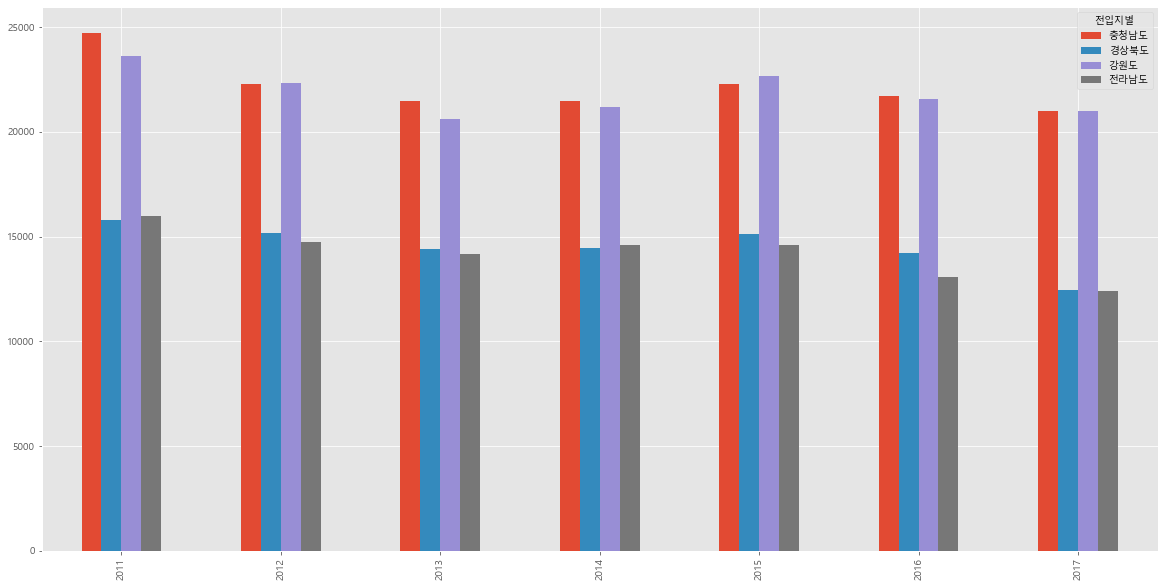

In [152]:
plt.style.use('ggplot')

t_subset_frm.plot(kind='bar' , figsize = (20, 10) )


plt.show()
plt.close()

In [155]:
print(' subset_frm 이용해서 전입인구 수의 합계를 구해서 새로운 열을 추가하고 ')
print(' 합계에 대한 가장 큰 값으로 정렬 - ')

subset_frm['합계'] = subset_frm.sum(axis = 1 )
subset_frm

 subset_frm 이용해서 전입인구 수의 합계를 구해서 새로운 열을 추가하고 
 합계에 대한 가장 큰 값으로 정렬 - 


,2011,2012,2013,2014,2015,2016,2017,합계
전입지별,,,,,,,,
충청남도,24723.0,22269.0,21486.0,21473.0,22299.0,21741.0,21020.0,155011.0
경상북도,15818.0,15191.0,14420.0,14456.0,15113.0,14236.0,12464.0,101698.0
강원도,23624.0,22332.0,20601.0,21173.0,22659.0,21590.0,21016.0,152995.0
전라남도,15974.0,14765.0,14187.0,14591.0,14598.0,13065.0,12426.0,99606.0


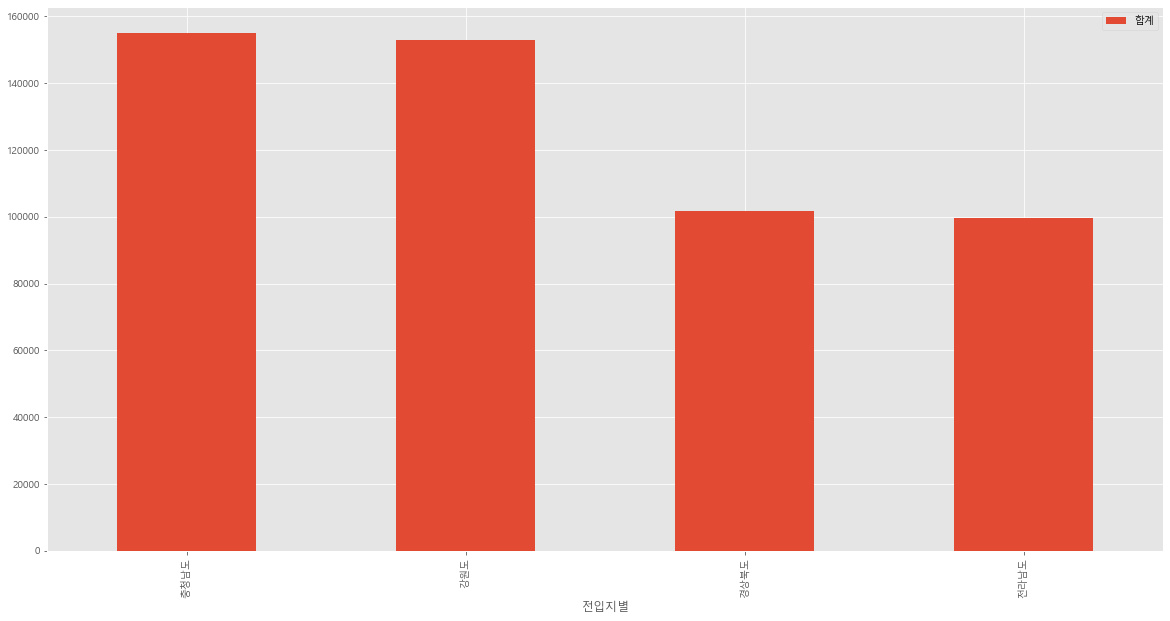

In [162]:
sum_subset_frm = subset_frm[['합계']].sort_values(by='합계' , ascending = False )
sum_subset_frm.plot(kind='bar' , figsize = (20, 10) )


plt.show()
plt.close()

In [165]:
print(' 요구사항 ^*^')
print(' 품종을 기준으로 그룹화하여 각 그룹의 평균을 구해서 시각화 한다면 - ')
print(' 열 이름을 한글로 변경하라 ( sepal_length -> 꽃받침길이 )')

iris_frm = iris_dataset.rename(columns = {
    iris_dataset.columns[0] : '꽃받침길이' ,
    iris_dataset.columns[1] : '꽃받침넓이' ,
    iris_dataset.columns[2] : '꽃잎길이' ,
    iris_dataset.columns[3] : '꽃잎넓이' ,
    iris_dataset.columns[4] : '품종'
})

iris_frm


 요구사항 ^*^
 품종을 기준으로 그룹화하여 각 그룹의 평균을 구해서 시각화 한다면 - 
 열 이름을 한글로 변경하라 ( sepal_length -> 꽃받침길이 )


,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [167]:
mean_iris_frm = iris_frm.groupby(iris_frm['품종']).mean()
mean_iris_frm

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이
품종,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


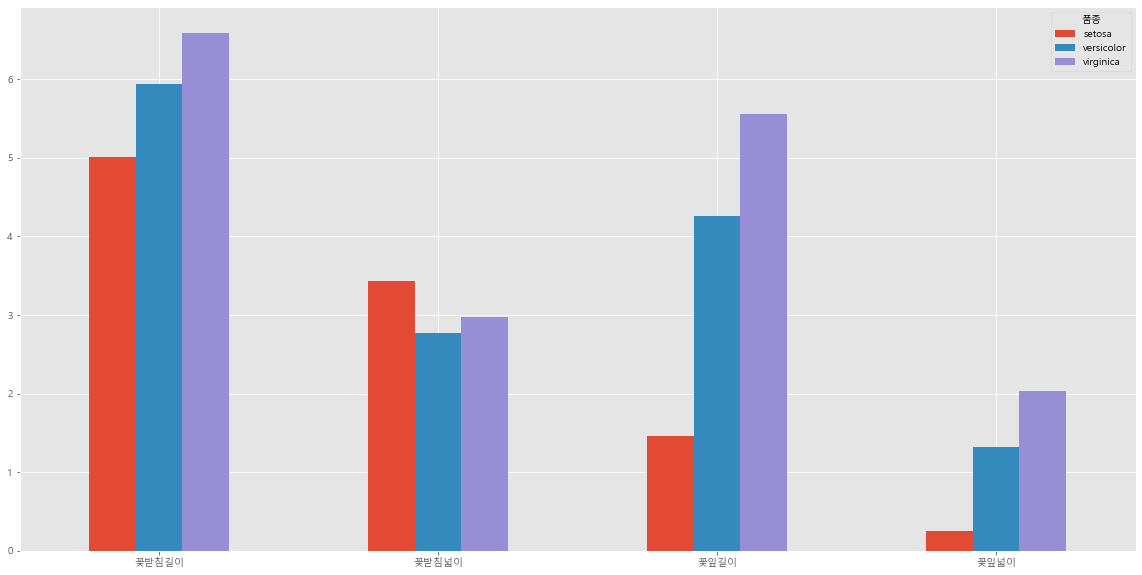

In [171]:
mean_iris_frm.T.plot(kind = 'bar' , figsize = (20, 10) , rot = 0) 

plt.show()
plt.close()

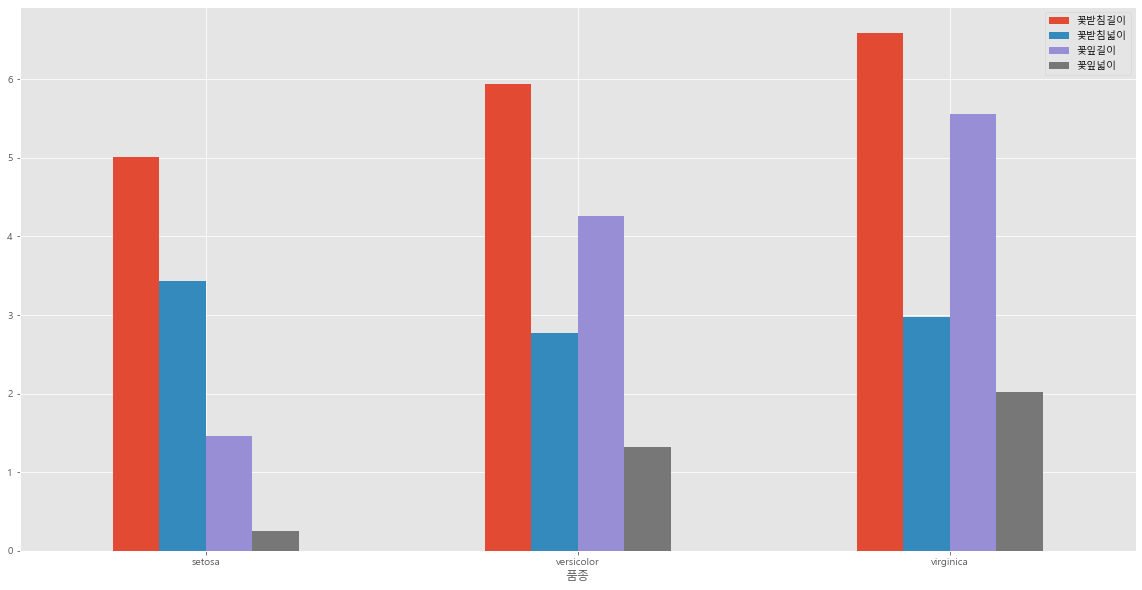

In [172]:
mean_iris_frm.plot(kind = 'bar' , figsize = (20, 10) , rot = 0) 

plt.show()
plt.close()

- 남북한발전전력량.xlsx

In [205]:
kepco_frm = pd.read_excel('./visualization_data/남북한발전전력량.xlsx')
kepco_frm

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [213]:
print(' 남한쪽 데이터 정보만 서브셋으로 - ') 
south_kor_subset = kepco_frm.loc[0:3]
south_kor_subset

 남한쪽 데이터 정보만 서브셋으로 - 


,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620


In [214]:
print(' 전력량 (억㎾h) 삭제 - ') 
south_kor_subset.drop('전력량 (억㎾h)' , axis = 1 , inplace = True)


 전력량 (억㎾h) 삭제 - 


In [215]:
print(' 발전 전력별 인덱스 재조정 - ') 
south_kor_subset.set_index('발전 전력별' , inplace = True)


 발전 전력별 인덱스 재조정 - 


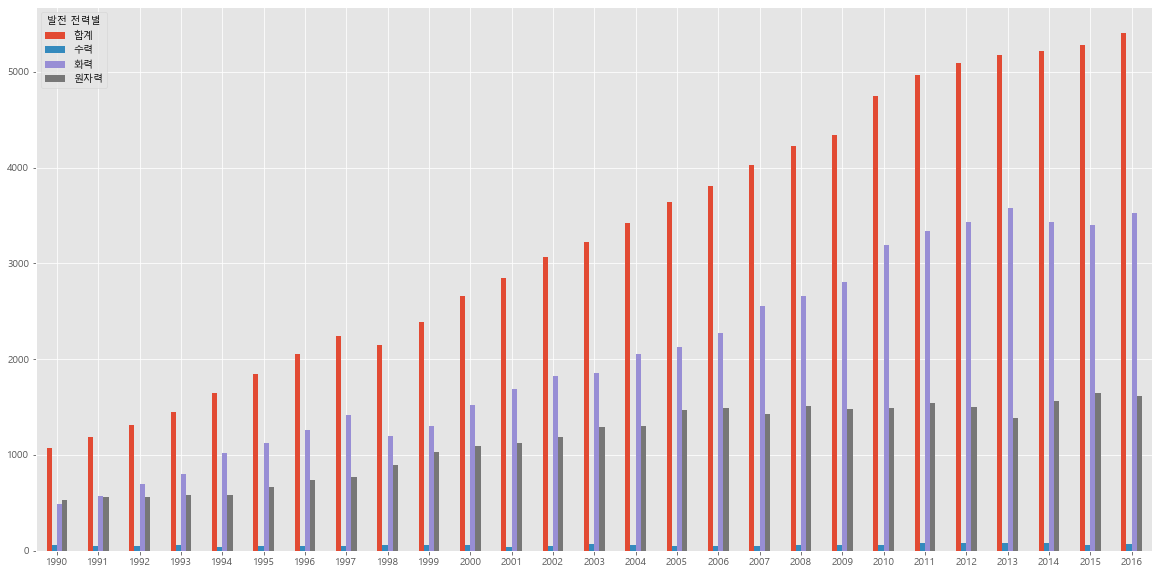

In [216]:

south_kor_subset.T.plot(kind = 'bar' , figsize = (20, 10) , rot = 0) 

plt.show()
plt.close()

- boxplot : 데이터의 분포 또는 이상치를 확인하기 위한 시각화
- plt.boxplot()
- frm.boxplot()

In [217]:
iris_frm

,꽃받침길이,꽃받침넓이,꽃잎길이,꽃잎넓이,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


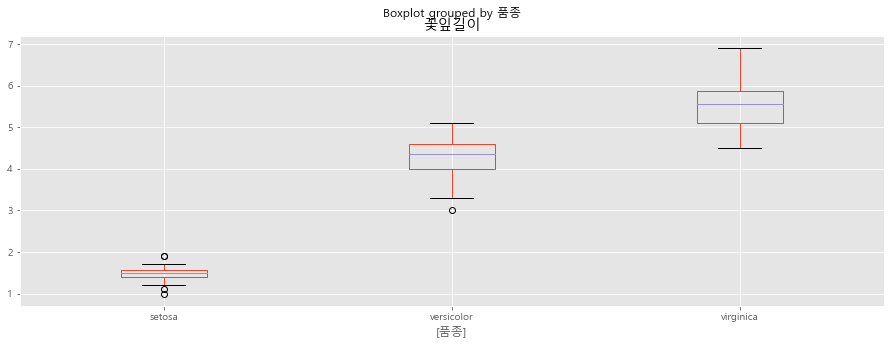

In [219]:
iris_frm[[ '꽃잎길이' , '품종']].boxplot(by = '품종' , figsize = (15, 5))

plt.show()
plt.close()